<a href="https://colab.research.google.com/github/ShanmukhVegi/Image-Classification/blob/main/Shanmukh_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM - Image Classification
based on: https://github.com/ShanmukhVegi/Image-Classification

In [45]:
# Importing all the required packages
#!pip install scikit-image

In [16]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from skimage.transform import resize
from skimage.io import imread

**NOTE** : Please enter Category Names same as folder name

In [17]:
Categories=['Cars', 'Ice cream cone', 'Cricket ball']
print("Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball");

while(True):
    check=input()
    if(check=='n' or check=='y'):
        break
    print("Please give a valid input (y/n)")
if(check=='y'):
    print("Enter How Many types of Images do you want to classify")
    n=int(input())
    Categories=[]
    print(f'please enter {n} names')
    for i in range(n):
        name=input()
        Categories.append(name)
    print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")

Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball
n


Loading all the images and creating a DataFrame

If you have your images in your google drive, simply mount the google Drive and copy the path of the folder containing all the Category images and Change the datadir variable to that path

In [7]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
#datadir='/content/drive/MyDrive/ML'
datadir='./'
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df # 67495 columns = 150 Pixels * 150 Pixels * 3 Colors (RGB)   (+ Target column)

loading... category : Cars
loaded category:Cars successfully
loading... category : Ice cream cone
loaded category:Ice cream cone successfully
loading... category : Cricket ball
loaded category:Cricket ball successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.609571,0.589963,0.605649,0.611236,0.591629,0.607315,0.615045,0.595437,0.611123,0.615501,...,0.980772,0.980772,0.980772,0.981178,0.981178,0.981178,0.982228,0.982228,0.982228,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
2,0.652026,0.707136,0.742359,0.650483,0.710976,0.744384,0.651130,0.711622,0.745030,0.659323,...,0.446558,0.391562,0.290075,0.451752,0.396755,0.295268,0.454683,0.397254,0.307931,0
3,0.745521,0.745521,0.737677,0.745524,0.745524,0.737681,0.746133,0.746133,0.738290,0.746558,...,0.877754,0.877754,0.877754,0.876393,0.876393,0.876393,0.873430,0.873430,0.873430,0
4,0.492812,0.768377,0.899329,0.496329,0.772481,0.900138,0.498134,0.774471,0.899768,0.501118,...,0.652859,0.589277,0.487179,0.639776,0.585112,0.487543,0.630475,0.572860,0.478700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
96,0.609519,0.561842,0.371250,0.647409,0.621020,0.297513,0.658226,0.634884,0.299603,0.635578,...,0.602130,0.765827,0.323386,0.690254,0.813153,0.520494,0.484045,0.691460,0.029988,2
97,0.933333,0.937255,0.956863,0.933333,0.937255,0.956863,0.933333,0.937255,0.956863,0.933333,...,0.933333,0.937255,0.956863,0.933333,0.937255,0.956863,0.933333,0.937255,0.956863,2
98,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2


### Splitting the data into training and testing data

In [28]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


This Part of code may take a while for training the data using SVC model 
(probability=True: SVMs do not directly provide probability estimates, these are internally calculated using logistic regression on the SVM’s scores, fit by an additional cross-validation on the training data).

In [30]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf', 'poly']}

svc=svm.SVC(probability=True) 
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [32]:
# Save model
joblib.dump(model, "./model.joblib")

['./model.joblib']

Predicting our testing data

In [34]:
# Load previously stored model
model = joblib.load("./model.joblib")

In [35]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1])

In [11]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1])

In [39]:
print(classification_report(y_pred,y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
confusion_matrix(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.75      0.86         8
           2       0.83      0.83      0.83         6

    accuracy                           0.85        20
   macro avg       0.86      0.86      0.85        20
weighted avg       0.88      0.85      0.85        20

The model is 85.0% accurate


array([[6, 0, 0],
       [1, 6, 1],
       [1, 0, 5]])

The Machine-Learning Based Model is Created Successfully. Now You can test for classification of any image which falls in the mentioned Categories

Testing of model :

Enter URL of Imagehttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTI6W_ejjCaJHpFn8kb3WKxb7GshrCJoVhPig&usqp=CAU


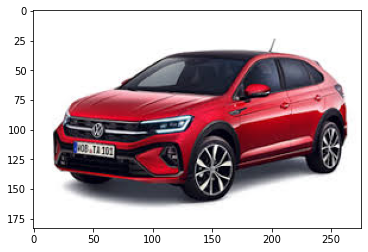

Cars = 70.54460376985206%
Ice cream cone = 3.3203865791455263%
Cricket ball = 26.135009651002417%
The predicted image is : Cars
Is the image a Cars ?(y/n)
y
Thank you for your feedback


In [44]:
#print(os.path.abspath(os.getcwd()))
# example URL https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTI6W_ejjCaJHpFn8kb3WKxb7GshrCJoVhPig&usqp=CAU
model=joblib.load("./model.joblib")

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
    b=input()
    if(b=="y" or b=="n"):
        break
    print("please enter either y or n")

if(b=='n'):
    print("What is the image?")
    for i in range(len(Categories)):
        print(f"Enter {i} for {Categories[i]}")
    k=int(input())
    while(k<0 or k>=len(Categories)):
        print(f"Please enter a valid number between 0-{len(Categories)-1}")
        k=int(input())
    print("Please wait for a while for the model to learn from this image :)")
    flat_arr=flat_data_arr.copy()
    tar_arr=target_arr.copy()
    tar_arr.append(k)
    flat_arr.extend(l)
    tar_arr=np.array(tar_arr)
    flat_df=np.array(flat_arr)
    df1=pd.DataFrame(flat_df)
    df1['Target']=tar_arr
    model1=GridSearchCV(svc,param_grid)
    x1=df1.iloc[:,:-1]
    y1=df1.iloc[:,-1]
    x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
    d={}
    for i in model.best_params_:
        d[i]=[model.best_params_[i]]
    model1=GridSearchCV(svc,d)
    model1.fit(x_train1,y_train1)
    y_pred1=model.predict(x_test1)
    print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
    pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")


This model learns from its mistake and rectifies them and does not repeat the same mistake again ;)